# Setup
## Install requirements

In [1]:

# pip install -r requirements.txt

## Upload dataframe from api or csv
Uses helper function `load_dataframe` from [helpers.py](helpers.py)

In [2]:
import requests
import json
import pandas as pd
from helpers import load_dataframe

# df = load_dataframe(input_type="api")
df = load_dataframe(input_type="csv", csv_path="apiGradesv3.csv")

print(df.shape)


(26139, 30)


/var/folders/ws/pxjcsvmx1w124qrkl_57jbpc0000gn/T/ipykernel_26459/3246391491.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Data Manupulation
## Filter on dataframe
Practicing pandas filtering

In [3]:
justubcv = df[df['campus']=='UBCV']
justubcv

,Unnamed: 0,average,campus,course,course_title,detail,educators,faculty_title,high,low,...,grades.55-59%,grades.60-63%,grades.64-67%,grades.68-71%,grades.72-75%,grades.76-79%,grades.80-84%,grades.85-89%,grades.90-100%,grades.<50%
0,0,93.900000,UBCV,390,Asian Migrations in a Global Context,A,Henry Yu,Faculty of Arts,100,85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN
1,1,86.700000,UBCV,327,Teaching Adults,NaN,Pierre Walter,Faculty of Education,93,76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,7.0,NaN
2,2,84.600000,UBCV,327,Teaching Adults,NaN,Dave Smulders,Faculty of Education,94,75,...,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,6.0,NaN
3,3,86.800000,UBCV,327,Teaching Adults,NaN,Dave Smulders,Faculty of Education,94,75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7.0,NaN
4,4,84.600000,UBCV,328,Institutions of Adult Education,NaN,Vicheth Sen,Faculty of Education,92,73,...,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21400,21400,81.400000,UBCV,150,Writing and Research in the Disciplines,B,David Newman,Faculty of Arts,91,71,...,0.0,0.0,0.0,1.0,0.0,6.0,13.0,4.0,1.0,0.0
21401,21401,73.500000,UBCV,150,Writing and Research in the Disciplines,B,Mi-Young Kim,Faculty of Arts,86,44,...,1.0,0.0,4.0,1.0,10.0,6.0,4.0,2.0,0.0,1.0
21402,21402,71.000000,UBCV,150,Writing and Research in the Disciplines,B,Mi-Young Kim,Faculty of Arts,83,54,...,2.0,4.0,5.0,2.0,4.0,3.0,8.0,0.0,0.0,0.0
21403,21403,76.900000,UBCV,150,Writing and Research in the Disciplines,B,David Newman,Faculty of Arts,85,67,...,0.0,0.0,1.0,2.0,9.0,6.0,10.0,1.0,0.0,0.0


## Querying dataframe with sqldf

In [4]:
import sqldf

query = """
SELECT campus, subject, course, average, year
FROM df
WHERE average >= 90  AND year >= 2020 AND course <500
"""
df_view = sqldf.run(query)
df_view

,campus,subject,course,average,year
0,UBCV,ACAM,390,93.9,2021
1,UBCV,ADHE,328,91.4,2021
2,UBCV,ADHE,330,90.6,2021
3,UBCV,APBI,497,91.2,2021
4,UBCV,ARCL,306,91.6,2021
...,...,...,...,...,...
1168,UBCO,VISA,460,91.7,2023
1169,UBCO,VISA,460,100.0,2023
1170,UBCO,VISA,460,100.0,2023
1171,UBCO,WRLD,399,96.4,2023


# Connection with PandasAI
pandas + openai
Goal: use generative AI to use questions to uncover answers in the data.
Ultimate goal: Give the answer and output visualizations to back up the answer.

## Sample pandasai chat query - asking for highest average

In [5]:
# Pandas and OpenAI
# pandasai examples https://github.com/gventuri/pandas-ai/tree/main/examples * 
from pandasai import SmartDataframe
from pandasai.llm import OpenAI
import os #!pip install python-dotenv
import openai # do i need this?

temp = os.getenv("OPENAI_API_KEY")
llm = OpenAI(api_token=temp) # note: set OPENAI_API_KEY=__ in .env file
smartdf = SmartDataframe(df, config={"llm": llm})
response = smartdf.chat("What course has the highest average? Give information about year, course, subject, and the average itself.")
print(response)

Unfortunately, I was not able to answer your question, because of the following error:

Invalid Input Error: Required module 'pandas.core.arrays.arrow.dtype' failed to import, due to the following Python exception:
ModuleNotFoundError: No module named 'pandas.core.arrays.arrow.dtype'



## pandasai SmartDataFrame can create plots
Question: are these using plotly? or another python graphing software?

'/Users/melissa/Documents/Personal Projects/my-ubc-grades/ubcgrades-dash/exports/charts/temp_chart.png'

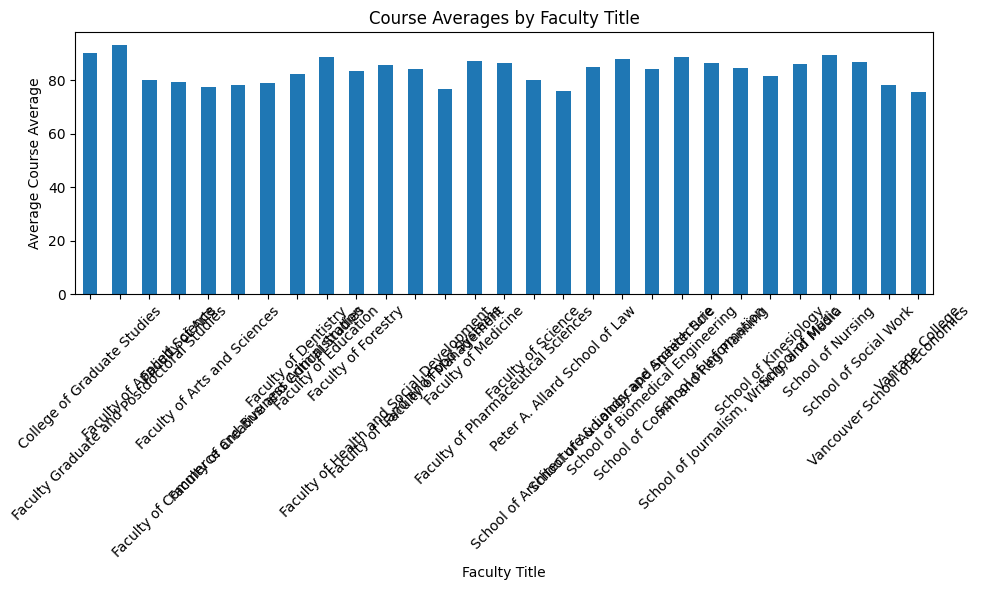

In [6]:
response = smartdf.chat("Plot course averages by faculty title.")


# Creating a dash app (in progress)


In [25]:
# sort df for loading in the dash chart
df.sort_values(by=['faculty_title', 'course'])

,Unnamed: 0,average,campus,course,course_title,detail,educators,faculty_title,high,low,...,grades.55-59%,grades.60-63%,grades.64-67%,grades.68-71%,grades.72-75%,grades.76-79%,grades.80-84%,grades.85-89%,grades.90-100%,grades.<50%
24894,24894,91.3,UBCO,503,Indigenous Research Methods,S,Shawn Wilson,College of Graduate Studies,96,83,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,11.0,0.0
24895,24895,91.3,UBCO,503,Indigenous Research Methods,S,None,College of Graduate Studies,96,83,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,11.0,0.0
24896,24896,95.3,UBCO,515,Advanced Qualitative Methods,A,Virginie Magnat,College of Graduate Studies,99,89,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,0.0
24897,24897,95.3,UBCO,515,Advanced Qualitative Methods,A,None,College of Graduate Studies,99,89,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,0.0
24898,24898,95.7,UBCO,515,Advanced Qualitative Methods,B,Fiona McDonald,College of Graduate Studies,100,86,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,873,73.4,UBCV,151,Multi-disciplinary Engineering Design Project,None,Seach Chyr Goh,Vantage College,90,0,...,NaN,NaN,NaN,NaN,6.0,11.0,NaN,6.0,NaN,NaN
8516,8516,74.9,UBCV,151,Multi-disciplinary Engineering Design Project,None,None,Vantage College,99,54,...,3.0,4.0,9.0,6.0,8.0,4.0,3.0,7.0,7.0,0.0
8517,8517,74.9,UBCV,151,Multi-disciplinary Engineering Design Project,None,Seach Chyr Goh,Vantage College,99,54,...,3.0,4.0,9.0,6.0,8.0,4.0,3.0,7.0,7.0,0.0
21365,21365,79.4,UBCV,151,Multi-disciplinary Engineering Design Project,None,None,Vantage College,93,33,...,2.0,2.0,0.0,1.0,3.0,1.0,18.0,19.0,2.0,1.0


In [59]:
# Not working
from dash import Dash, html, dcc, callback, Output, Input
import plotly.express as px

# import pandas as pd

# df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminder_unfiltered.csv')
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = Dash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div([
    html.H1(children='UBC Grades - Dash', style={'textAlign':'center'}),
    html.Div(className="row", children=[
        # html.Div(className="column", children=[
        #     html.Label(["Year:"]),
        #     dcc.Slider(df.year.min(), df.year.max(), step=1, value=2021, id='year')
        # ]),
        html.Div(className="column", children=[
            html.Label(["Campus:"]),
            dcc.Dropdown(df.campus.unique(), value='UBCV', id='campus')
        ]),
        html.Div(className="column", children=[
            html.Label(["Faculty Title:"]),
            dcc.Dropdown(df.faculty_title.unique(), value='Faculty of Science', id='faculty')
        ]),
        html.Div(className="column", children=[
            html.Label(["Subject:"]),
            dcc.Dropdown(df.subject.unique(), value='CPSC', id='subject')
        ]),
        html.Div(className="column", children=[
            html.Label(["Course:"]),
            dcc.Dropdown(df.course.unique(), value='210', id='course')
        ]),
    ], style=dict(display='flex')),
    html.Br(),
    # html.Div(id='my-output'),
    dcc.Graph(id='plot') #not sure about html.Br (breakline)
])

@callback(
    Output(component_id='plot', component_property='figure'),
    # Input(component_id='year', component_property='value'),
    Input(component_id='campus', component_property='value'),
    Input(component_id='faculty', component_property='value'),
    Input(component_id='subject', component_property='value'),
    Input(component_id='course', component_property='value'),
)
def update_graph(campus_value, faculty_value, subject_value, course_value ):
    dff = df.copy()
    dff = dff[dff.campus==campus_value]
    dff = dff[dff.faculty_title==faculty_value]
    dff = dff[dff.subject==subject_value]
    dff = dff[dff.course==course_value]
    return px.scatter(dff, x='year', y='average',
        color='average', hover_data=['course', 'section'])

if __name__ == '__main__':
    app.run(debug=True)


In [27]:
import sqldf

query = """
SELECT campus, subject, course, average, year, section
FROM df
WHERE subject=="CPSC" AND course=="210" AND section=="101"
"""
df_view = sqldf.run(query)
df_view

,campus,subject,course,average,year,section
0,UBCV,CPSC,210,78.4,2021,101
1,UBCV,CPSC,210,80.1,2022,101


In [9]:
# Sample bar chart
import plotly.express as px
dff = df[(df.campus == "UBCV") & (df.subject == "CPSC") & (df.course == "210") & (df.section == "101")]
fig = px.bar(dff, x='year', y='average', title="UBCV CPSC 210 section 101")
fig.show()

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
NameError: name 'year' is not defined



In [10]:
# Trying to get to like ubcgrades.com distribution (grades ranges and counts)
## currently column headers are grades.50-54%,grades.55-59%,grades.60-63%,grades.64-67%,grades.68-71%,grades.72-75%,grades.76-79%,grades.80-84%,grades.85-89%,grades.90-100%,grades.<50%
## but i want to sort by grades

import plotly.express as px
dff = df[(df.campus == "UBCV") & (df.subject == "CPSC") & (df.course == "210")]
fig = px.histogram(dff, x='grades')
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Unnamed: 0', 'average', 'campus', 'course', 'course_title', 'detail', 'educators', 'faculty_title', 'high', 'low', 'median', 'percentile_25', 'percentile_75', 'reported', 'section', 'session', 'subject', 'subject_title', 'year', 'grades.50-54%', 'grades.55-59%', 'grades.60-63%', 'grades.64-67%', 'grades.68-71%', 'grades.72-75%', 'grades.76-79%', 'grades.80-84%', 'grades.85-89%', 'grades.90-100%', 'grades.<50%'] but received: grades

,campus,subject,course,average,year,section
0,UBCV,CPSC,210,78.4,2021,101
1,UBCV,CPSC,210,80.1,2022,101
